In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Data Science-ML/DATA SCIENCE- EXCELR/material/Project/Data 1/Trial/drug_dataset.csv')

In [ ]:
df.shape

(215063, 9)

In [ ]:
df.describe()

rating    usefulCount
count  215063.000000  215063.000000  215063.000000
mean   116039.364814       6.990008      28.001004
std     67007.913366       3.275554      36.346069
min         0.000000       1.000000       0.000000
25%     58115.500000       5.000000       6.000000
50%    115867.000000       8.000000      16.000000
75%    173963.500000      10.000000      36.000000
max    232291.000000      10.000000    1291.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215063 entries, 0 to 215062
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0                      215063 non-null  int64 
 1   drugName           215063 non-null  object
 2   condition          213869 non-null  object
 3   review             215063 non-null  object
 4   rating             215063 non-null  int64 
 5   date               215063 non-null  object
 6   usefulCount        215063 non-null  int64 
 7   sideEffects        215063 non-null  object
 8   sideEffectsReview  215063 non-null  object
dtypes: int64(3), object(6)
memory usage: 14.8+ MB


In [ ]:
df.isnull().sum()

                        0
drugName                0
condition            1194
review                  0
rating                  0
date                    0
usefulCount             0
sideEffects             0
sideEffectsReview       0
dtype: int64

In [ ]:
import re 

In [ ]:
df['drugName']=df['drugName'].apply(lambda x : re.sub('[^a-zA-Z]', ' ',x))
df['drugName']=df['drugName'].apply(lambda x : x.lower())
df['drugName']=df['drugName'].apply(lambda x : x.strip())

In [ ]:
'''Types of drug in our dataset'''

print('Types of drug')
df['drugName'].unique()

Types of drug


array(['valsartan', 'guanfacine', 'lybrel', ..., 'pegaptanib', 'fibercon',
       'allergy dn pe'], dtype=object)

In [ ]:
'''Number of drugs in our data set'''

print('Number of drugs')
len(df['drugName'].unique())

Number of drugs


3629

In [ ]:
'''Count of each drugs'''

pd.set_option('max_rows',None)
print('Count of each drugs')
df['drugName'].value_counts().head()

Count of each drugs


levonorgestrel                       4930
etonogestrel                         4421
ethinyl estradiol   norethindrone    3753
nexplanon                            2892
ethinyl estradiol   norgestimate     2790
Name: drugName, dtype: int64

In [ ]:
# most popular drug
df['drugName'].value_counts().head()

levonorgestrel                       4930
etonogestrel                         4421
ethinyl estradiol   norethindrone    3753
nexplanon                            2892
ethinyl estradiol   norgestimate     2790
Name: drugName, dtype: int64

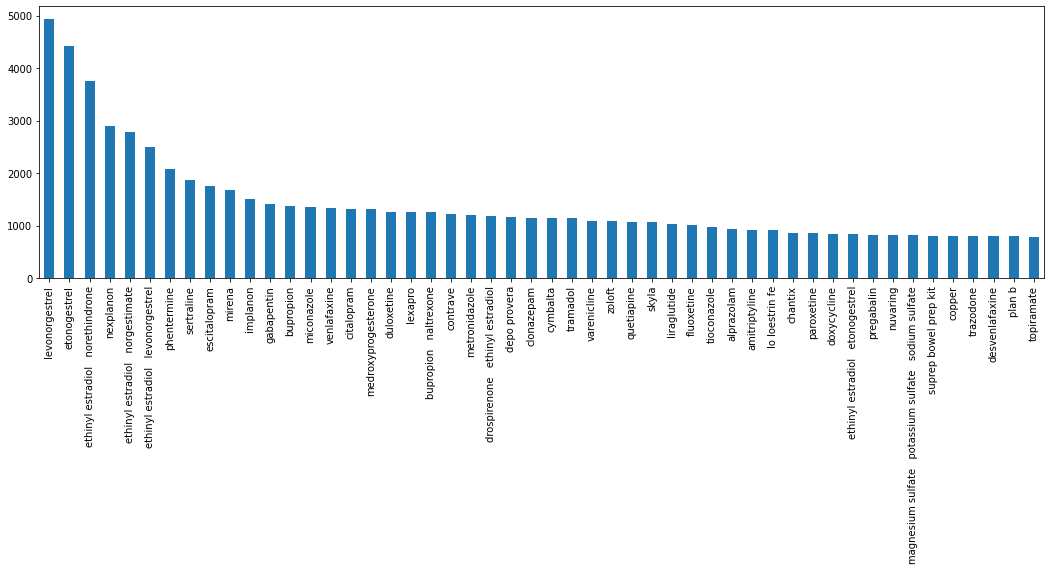

In [ ]:
'''Top 50 used Drugs'''

plt.figure(figsize=(18,5))
df['drugName'].value_counts().head(50).plot(kind='bar')

In [ ]:
''' Number of Drugs with minimus count '''
xl=df['drugName'].value_counts()==1
j=0
for i in xl:
    if i==True:
        j+=1
print(j)

782


In [ ]:
''' Name of Drugs with minimus count '''

pd.set_option('max_rows',None)
df['drugName'].value_counts().tail(804)

vitapap                                                                   2
prednisolone   sulfacetamide sodium                                       2
kemadrin                                                                  2
oxiconazole                                                               2
lamictal xr                                                               2
glipizide   metformin                                                     2
travatan                                                                  2
blephamide                                                                2
salagen                                                                   2
briviact                                                                  2
pacerone                                                                  2
dexchlorpheniramine   dextromethorphan   pseudoephedrine                  2
desyrel dividose                                                          2
rogaine men 

In [ ]:
df['drugName'].value_counts().nlargest(20)

levonorgestrel                        4930
etonogestrel                          4421
ethinyl estradiol   norethindrone     3753
nexplanon                             2892
ethinyl estradiol   norgestimate      2790
ethinyl estradiol   levonorgestrel    2503
phentermine                           2085
sertraline                            1868
escitalopram                          1747
mirena                                1673
implanon                              1506
gabapentin                            1415
bupropion                             1369
miconazole                            1344
venlafaxine                           1338
citalopram                            1308
medroxyprogesterone                   1308
duloxetine                            1256
lexapro                               1250
bupropion   naltrexone                1249
Name: drugName, dtype: int64

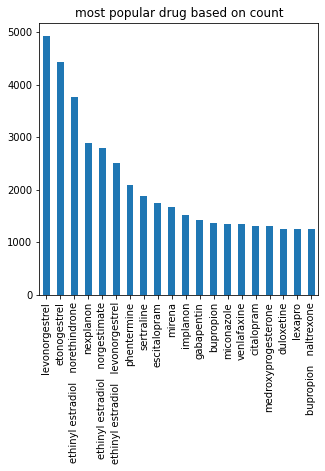

In [ ]:
plt.figure(figsize=(5,5))
df['drugName'].value_counts().nlargest(20).plot(kind='bar')
plt.title('most popular drug based on count')
plt.show()

In [ ]:
df['drugName'].value_counts().nsmallest(20)

konsyl                 1
topicort lp            1
prolastin c            1
monopril               1
acnex                  1
larissia               1
avar ls cleanser       1
cladribine             1
excedrin quick tab     1
micrainin              1
inulin                 1
reslizumab             1
zebeta                 1
penlac                 1
fluvastatin            1
hemin                  1
belladonna tincture    1
apidra                 1
rosac                  1
tetracaine             1
Name: drugName, dtype: int64

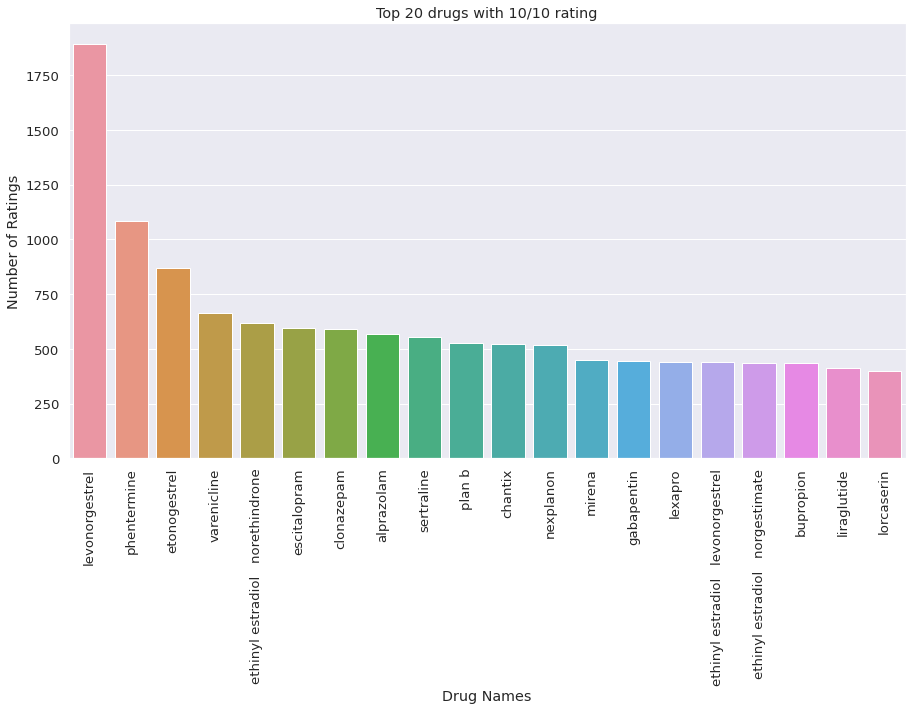

In [ ]:
# This barplot shows the top 20 drugs with the 10/10 rating
import seaborn as sns

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df.loc[df.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

sns_rating.set_title('Top 20 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

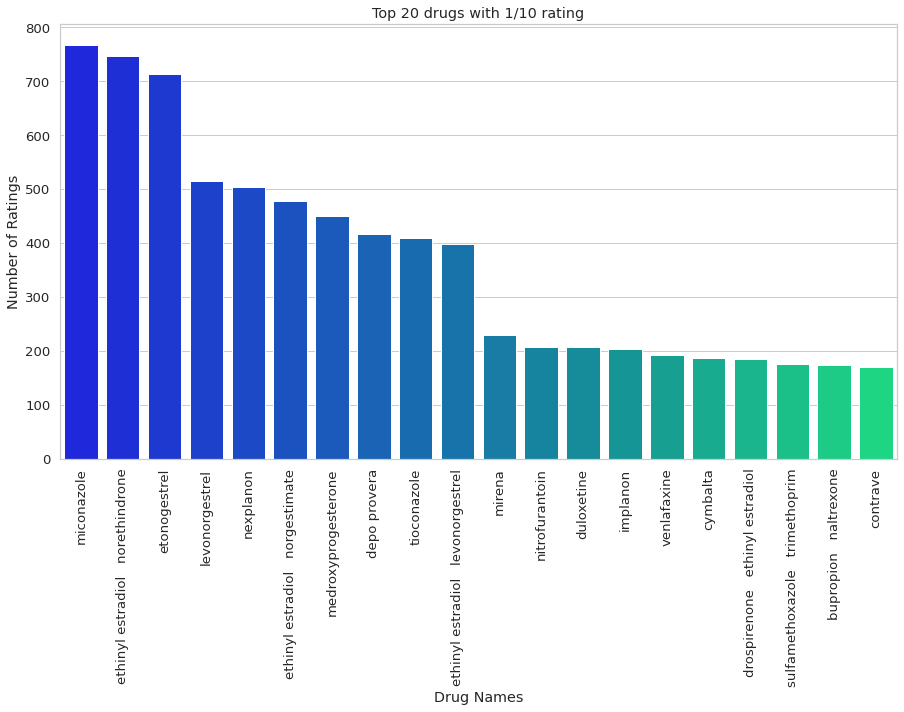

In [ ]:
# This barplot shows the Top 20 drugs with the 1/10 rating
import seaborn as sns

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'whitegrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df.loc[df.rating == 1, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'winter')

sns_rating.set_title('Top 20 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

Text(0.5, 0, 'Rating')

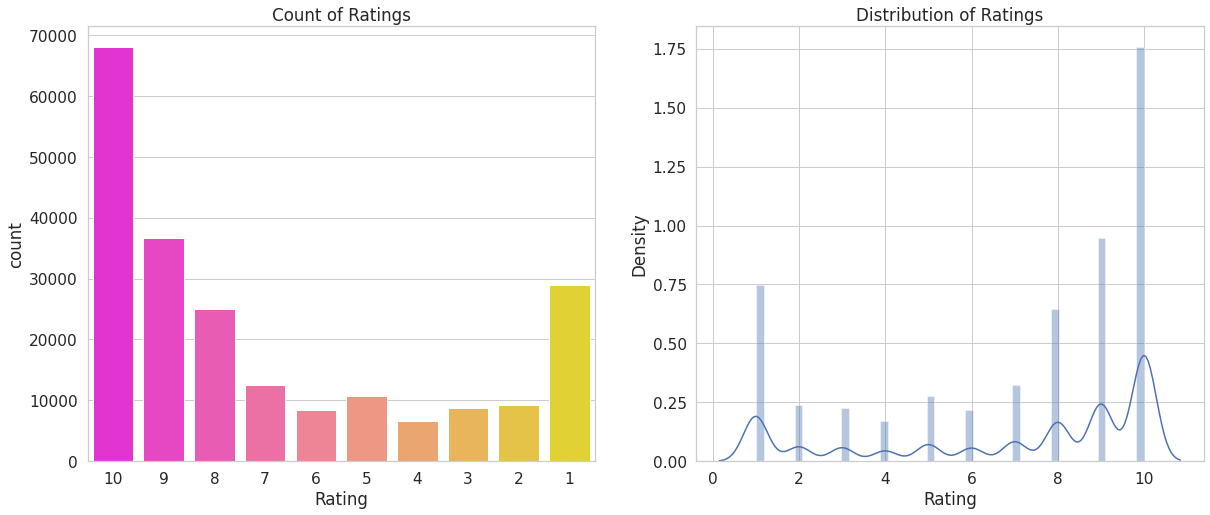

In [ ]:
# A countplot of the ratings so we can see the distribution of the ratings
plt.rcParams['figure.figsize'] = [20,8]
sns.set(font_scale = 1.4, style = 'whitegrid')
fig, ax = plt.subplots(1, 2)

sns_1 = sns.countplot(df['rating'], palette = 'spring', order = list(range(10, 0, -1)), ax = ax[0])
sns_2 = sns.distplot(df['rating'], ax = ax[1])
sns_1.set_title('Count of Ratings')
sns_1.set_xlabel("Rating")

sns_2.set_title('Distribution of Ratings')
sns_2.set_xlabel("Rating")

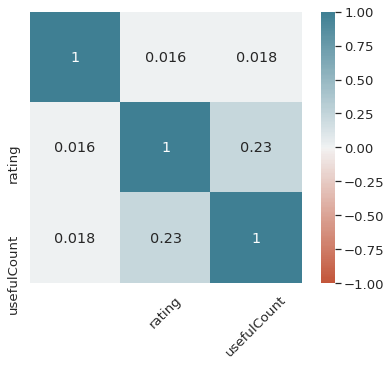

In [ ]:
# Heatmap of the correlation matrix
plt.rcParams['figure.figsize'] = [7,5]
sns.set(font_scale = 1.2)
corr = df.select_dtypes(include = 'int64').corr()
sns_heat = sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(20, 220, n=200), square=True);
plt.setp(sns_heat.get_xticklabels(), rotation = 45);

In [ ]:
df.head()

...                                  sideEffectsReview
0  206461  ...  * mild nausea, vomiting, bloating, stomach cra...
1   95260  ...  * mild nausea, vomiting, bloating, stomach cra...
2   92703  ...  * mild nausea, vomiting, bloating, stomach cra...
3  138000  ...  An occasional headache was experienced while t...
4   35696  ...  An occasional headache was experienced while t...

[5 rows x 9 columns]

CONDITION

In [ ]:
df['condition']=df['condition'].apply(lambda x : re.sub('[^a-zA-Z]', ' ',str(x)))
df['condition']=df['condition'].apply(lambda x : x.lower())
df['condition']=df['condition'].apply(lambda x : x.strip())

In [ ]:
'''Type of condition'''

df['condition'].unique()

array(['left ventricular dysfunction', 'adhd', 'birth control',
       'opiate dependence', 'benign prostatic hyperplasia',
       'emergency contraception', 'bipolar disorde', 'epilepsy',
       'migraine prevention', 'depression', 'crohn s disease', 'cough',
       'obesity', 'urinary tract infection', 'ibromyalgia',
       'chronic myelogenous leukemia', 'hiv infection', 'insomnia',
       'rheumatoid arthritis', 'vaginal yeast infection',
       'chlamydia infection', 'hirsutism', 'panic disorde', 'migraine',
       'nan', 'pain', 'irritable bowel syndrome', 'osteoarthritis',
       'constipation', 'bowel preparation', 'psychosis', 'muscle spasm',
       'hepatitis c', 'overactive bladde', 'diabetes  type',
       'asthma  maintenance', 'non small cell lung cance',
       'schizophrenia', 'dysuria', 'smoking cessation', 'anxiety', 'acne',
       'emale infertility', 'constipation  acute',
       'constipation  drug induced', 'erectile dysfunction',
       'trigeminal neuralgia', 'u

In [ ]:
df['condition'].value_counts().head(10)

birth control      38436
depression         12164
pain                8245
anxiety             7812
acne                7435
bipolar disorde     5604
insomnia            4904
weight loss         4857
obesity             4757
adhd                4509
Name: condition, dtype: int64

In [ ]:
''' Top 50 most resons for using drugs by the patients'''

df['condition'].value_counts().head(50)

birth control                             38436
depression                                12164
pain                                       8245
anxiety                                    7812
acne                                       7435
bipolar disorde                            5604
insomnia                                   4904
weight loss                                4857
obesity                                    4757
adhd                                       4509
diabetes  type                             3547
emergency contraception                    3290
high blood pressure                        3104
vaginal yeast infection                    3085
abnormal uterine bleeding                  2744
bowel preparation                          2498
smoking cessation                          2440
ibromyalgia                                2370
migraine                                   2277
anxiety and stress                         2236
major depressive disorde                

In [ ]:
len(df['condition'].value_counts())

837

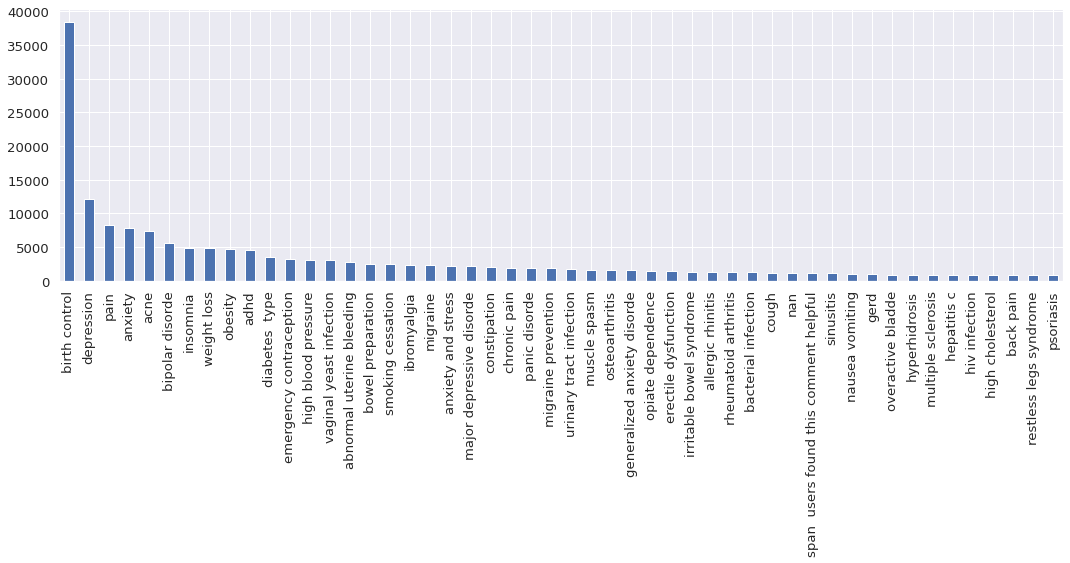

In [ ]:
''' Top 50 most occuring resons for using drugs by the patients'''

plt.figure(figsize=(18,5))
df['condition'].value_counts().head(50).plot(kind='bar')

In [ ]:
df['condition'].value_counts().nlargest(20)

birth control                38436
depression                   12164
pain                          8245
anxiety                       7812
acne                          7435
bipolar disorde               5604
insomnia                      4904
weight loss                   4857
obesity                       4757
adhd                          4509
diabetes  type                3547
emergency contraception       3290
high blood pressure           3104
vaginal yeast infection       3085
abnormal uterine bleeding     2744
bowel preparation             2498
smoking cessation             2440
ibromyalgia                   2370
migraine                      2277
anxiety and stress            2236
Name: condition, dtype: int64

In [ ]:
''' Number of Drugs with minimus count '''
xo=df['condition'].value_counts()==1
j=0
for i in xo:
    if i==True:
        j+=1
print(j)

82


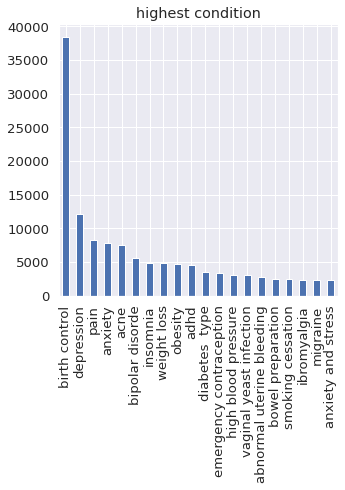

In [ ]:
plt.figure(figsize=(5,5))
df['condition'].value_counts().nlargest(20).plot(kind='bar')
plt.title('highest condition')
plt.show()

In [ ]:
''' Least occuring resons for using drugs by the patients'''

df['condition'].value_counts().nsmallest(82)

parkinsonian trem                                          1
asystole                                                   1
cerebrovascular insufficiency                              1
lyme disease  erythema chronicum migrans                   1
hemangioma                                                 1
esophageal spasm                                           1
short stature for age                                      1
neoplastic diseases                                        1
gastric cance                                              1
rat bite feve                                              1
microscopic polyangiitis                                   1
pulmonary edema                                            1
steroid responsive inflammatory conditions                 1
jet lag                                                    1
diagnostic bronchograms                                    1
somatoform pain disorde                                    1
infectious diarrhea     

In [ ]:
'''Drug used  in multiple condtion'''

df.groupby('drugName')['condition'].nunique().sort_values(ascending=False)

drugName
prednisone                                                                                          39
gabapentin                                                                                          32
ciprofloxacin                                                                                       26
amitriptyline                                                                                       25
doxycycline                                                                                         25
metronidazole                                                                                       24
venlafaxine                                                                                         24
dexamethasone                                                                                       23
triamcinolone                                                                                       21
azithromycin                                                    

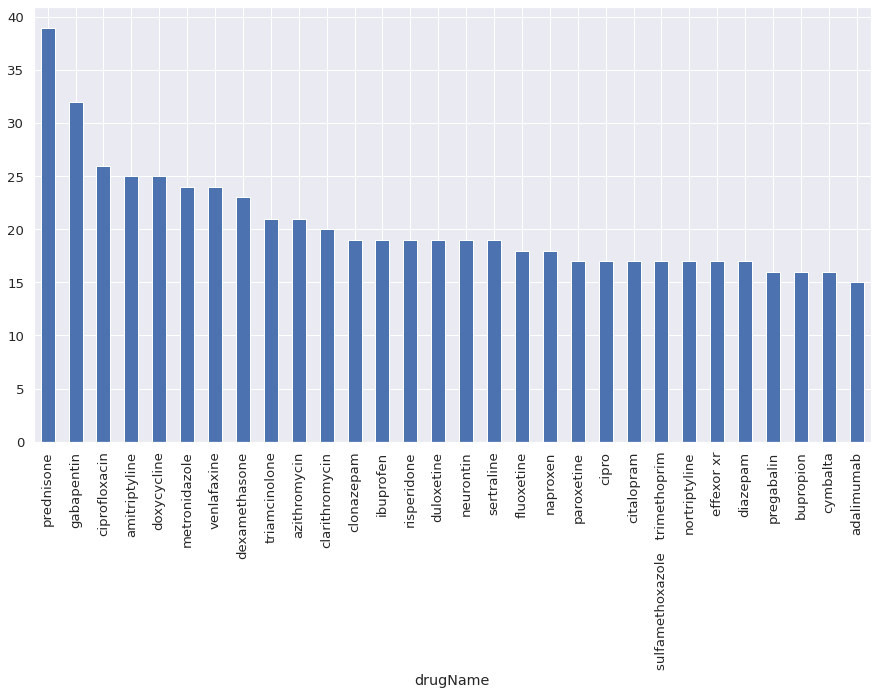

In [ ]:
plt.figure(figsize=(15,8))
df.groupby('drugName')['condition'].nunique().sort_values(ascending=False).head(30).plot(kind='bar')

In [ ]:
''' Drugs Used fot the condition'''

pd.set_option('display.max_columns', None)
xe=pd.DataFrame(df.groupby('condition')['drugName'].value_counts())
xe

drugName
condition                                          drugName                                                    
abdominal distension                               bethanechol                                                1
                                                   urecholine                                                 1
abnormal uterine bleeding                          medroxyprogesterone                                      500
                                                   depo provera                                             435
                                                   levonorgestrel                                           355
                                                   mirena                                                   327
                                                   ethinyl estradiol   norgestimate                         199
                                                   ethinyl estradiol   levonorgestrel                       145
                                                   ethinyl estradiol   norethindrone                        113
                                                   norethindrone                                             80
                                                   sprintec                                                  53
                                                   seasonique                                                51
                                                   loestrin    fe                                            48
                                                   provera                                                   48
                                                   tri sprintec                                              29
                                                   mononessa                                                 26
                                                   ethinyl estradiol   norgestrel                            22
                                                   estarylla                                                 21
                                                   megestrol                                                 20
                                                   tri previfem                                              16
                                                   nora be                                                   15
                                                   trinessa                                                  15
                                                   loseasonique                                              14
                                                   junel fe                                                  12
                                                   aviane                                                    11
                                                   cryselle                                                  10
                                                   ortho micronor                                             9
                                                   alesse                                                     8
                                                   gildess fe                                                 8
                                                   ortho tri cyclen                                           8
                                                   quasense                                                   8
                                                   tri lo sprintec                                            8
                                                   microgestin fe                                             7
                                                   previfem                                                   7
                                                   jolessa             

RATEING


In [ ]:
df.groupby('rating').size()

rating
1     28918
2      9265
3      8718
4      6671
5     10723
6      8462
7     12547
8     25046
9     36708
10    68005
dtype: int64

10    68005
9     36708
1     28918
8     25046
7     12547
5     10723
2      9265
3      8718
6      8462
4      6671
Name: rating, dtype: int64


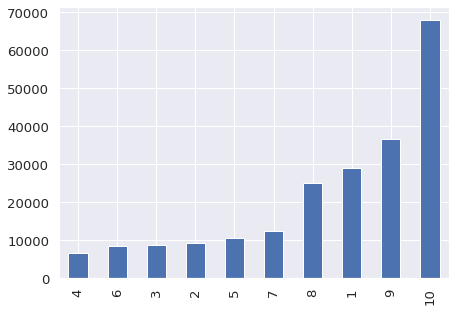

In [ ]:
print(df['rating'].value_counts())
df['rating'].value_counts().sort_values().plot(kind='bar')

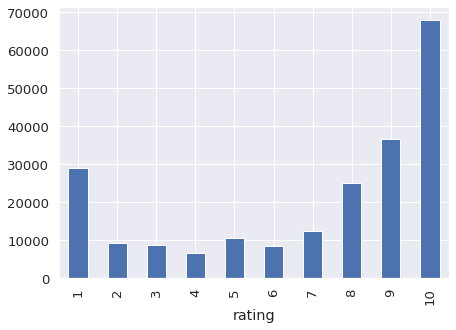

In [ ]:
df.groupby('rating').size().plot(kind='bar')

In [ ]:
df['rating'].describe()

count    215063.000000
mean          6.990008
std           3.275554
min           1.000000
25%           5.000000
50%           8.000000
75%          10.000000
max          10.000000
Name: rating, dtype: float64

In [ ]:
# avg rateing of the drugs
avg_rateing=(df['rating'].groupby(df['drugName'])).mean()

In [ ]:
avg_rateing

drugName
a   b otic                                                                                          10.000000
a   d cracked skin relief                                                                           10.000000
abacavir   dolutegravir   lamivudine                                                                 8.414286
abacavir   lamivudine                                                                               10.000000
abacavir   lamivudine   zidovudine                                                                   9.000000
abatacept                                                                                            7.000000
abilify                                                                                              6.443508
abilify discmelt                                                                                     8.333333
abilify maintena                                                                                     8.200000
a

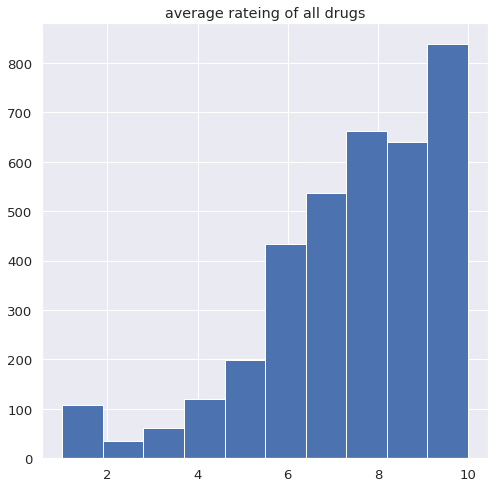

In [ ]:
# average rateing of all drug
plt.figure(figsize=(8,8))
avg_rateing.hist()
plt.title('average rateing of all drugs')
plt.show()

In [ ]:
''' Drugs with rating 10'''

xr=df[df['rating']==10.0]
xr.head()

drugName                     condition  \
7   102654    aripiprazole               bipolar disorde   
11   75612  l methylfolate                    depression   
18  212077     lamotrigine               bipolar disorde   
19  119705       nilotinib  chronic myelogenous leukemia   
21  231466       trazodone                      insomnia   

                                               review  rating  \
7   "Abilify changed my life. There is hope. I was...      10   
11  "I have taken anti-depressants for years, with...      10   
18  "I&#039;ve been on every medicine under the su...      10   
19  "I have been on Tasigna for just over 3 years ...      10   
21  "I have insomnia, it&#039;s horrible. My story...      10   

                 date  usefulCount            sideEffects  \
7      March 14, 2015           32      Mild Side Effects   
11      March 9, 2017           54        No Side Effects   
18   November 9, 2014           18  Moderate Side Effects   
19  September 1, 2015           11  Moderate Side Effects   
21      April 3, 2016           43      Mild Side Effects   

                                    sideEffectsReview  
7                                           Tiredness  
11                                         none to me  
18  Within 2 months I noticed my eyes felt straine...  
19  flushed face, sleepiness, equilibrium out of b...  
21  The drug is an anti-depressant. The side effec...

In [ ]:
'''Average rating given'''

df.groupby('drugName')['rating'].mean().sort_values(ascending=False)

drugName
a   b otic                                                                                          10.000000
hypotears                                                                                           10.000000
florinef acetate                                                                                    10.000000
bupivacaine liposome                                                                                10.000000
buprenex                                                                                            10.000000
refresh pm                                                                                          10.000000
busulfan                                                                                            10.000000
red yeast rice                                                                                      10.000000
fletchers castoria                                                                                  10.000000
r

In [ ]:
'''Drug with highest rating counts '''

xr['drugName'].value_counts()

levonorgestrel                                                                         1892
phentermine                                                                            1085
etonogestrel                                                                            870
varenicline                                                                             666
ethinyl estradiol   norethindrone                                                       618
escitalopram                                                                            597
clonazepam                                                                              590
alprazolam                                                                              569
sertraline                                                                              553
plan b                                                                                  527
chantix                                                                         

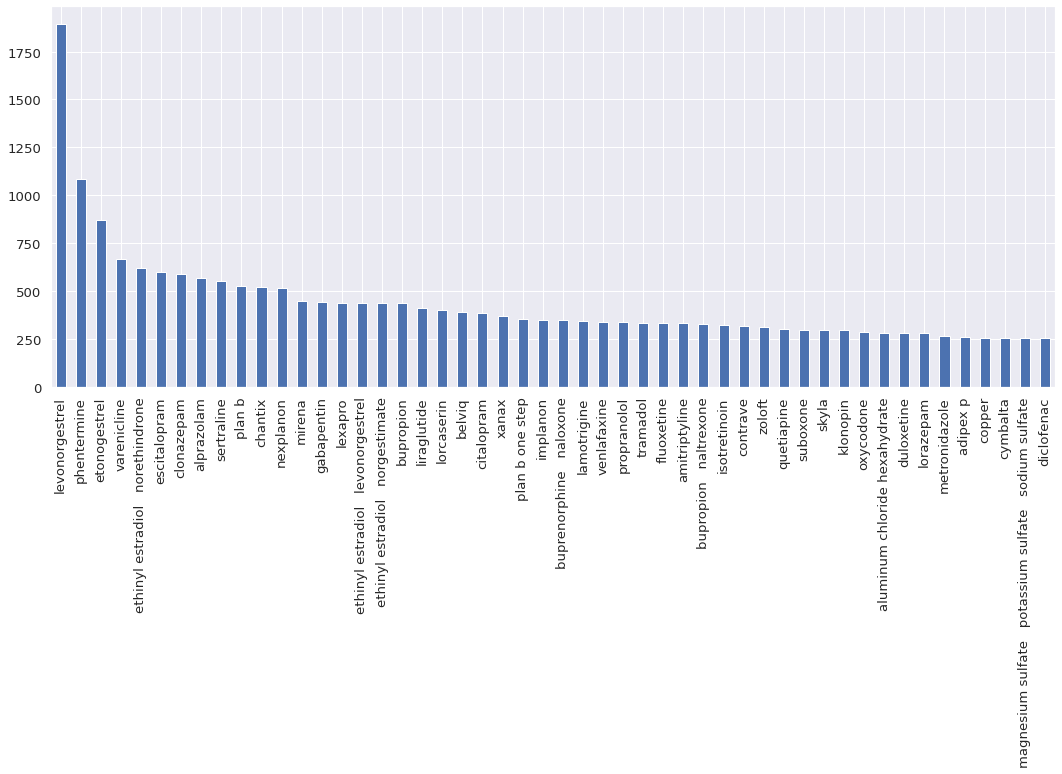

In [ ]:
'''Drug with highest rating '''

plt.figure(figsize=(18,7))
xr['drugName'].value_counts().head(50).plot(kind='bar')

In [ ]:
# data preprocessing 
df['review'][5]

'"2nd day on 5mg started to work with rock hard erections however experianced headache, lower bowel preassure. 3rd day erections would wake me up &amp; hurt! Leg/ankles aches   severe lower bowel preassure like you need to go #2 but can&#039;t! Enjoyed the initial rockhard erections but not at these side effects or $230 for months supply! I&#039;m 50 &amp; work out 3Xs a week. Not worth side effects!"'

In [ ]:
df['sideEffectsReview'][5]

'An occasional headache was experienced while taking the medication but was releaved by asprin.'

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

stopwords

In [ ]:
from nltk.corpus import stopwords
stop=stopwords.words('english')

In [ ]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
from bs4 import BeautifulSoup
import re

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

porter = PorterStemmer()

lemmatizer = WordNetLemmatizer()

In [ ]:
def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ',  review_text )
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stop]
    # 6. lemmitization
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(lemmitize_words))

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df['review_clean'] = df['review'].apply(review_to_words)

In [ ]:
df.head()

drugName                     condition  \
0  206461                 valsartan  left ventricular dysfunction   
1   95260                guanfacine                          adhd   
2   92703                    lybrel                 birth control   
3  138000                ortho evra                 birth control   
4   35696  buprenorphine   naloxone             opiate dependence   

                                              review  rating  \
0  "It has no side effect, I take it in combinati...       9   
1  "My son is halfway through his fourth week of ...       8   
2  "I used to take another oral contraceptive, wh...       5   
3  "This is my first time using any form of birth...       8   
4  "Suboxone has completely turned my life around...       9   

                date  usefulCount            sideEffects  \
0       May 20, 2012           27  Moderate Side Effects   
1     April 27, 2010          192  Moderate Side Effects   
2  December 14, 2009           17  Moderate Side Effects   
3   November 3, 2015           10      Mild Side Effects   
4  November 27, 2016           37      Mild Side Effects   

                                   sideEffectsReview  \
0  * mild nausea, vomiting, bloating, stomach cra...   
1  * mild nausea, vomiting, bloating, stomach cra...   
2  * mild nausea, vomiting, bloating, stomach cra...   
3  An occasional headache was experienced while t...   
4  An occasional headache was experienced while t...   

                                        review_clean  
0  side effect take combination bystolic mg fish oil  
1  son halfway fourth week intuniv became concern...  
2  used take another oral contraceptive pill cycl...  
3  first time using form birth control glad went ...  
4  suboxone completely turned life around feel he...

In [ ]:
def sideEffects_to_words(raw_sideEffects):
    # 1. Delete HTML 
    sideEffects_text = BeautifulSoup(raw_sideEffects, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ',  sideEffects_text )
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stop]
    # 6. lemmitization
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(lemmitize_words))

In [ ]:
df['sideEffects_clean'] = df['sideEffects'].apply(sideEffects_to_words)

In [ ]:
df.head()

drugName                     condition  \
0  206461                 valsartan  left ventricular dysfunction   
1   95260                guanfacine                          adhd   
2   92703                    lybrel                 birth control   
3  138000                ortho evra                 birth control   
4   35696  buprenorphine   naloxone             opiate dependence   

                                              review  rating  \
0  "It has no side effect, I take it in combinati...       9   
1  "My son is halfway through his fourth week of ...       8   
2  "I used to take another oral contraceptive, wh...       5   
3  "This is my first time using any form of birth...       8   
4  "Suboxone has completely turned my life around...       9   

                date  usefulCount            sideEffects  \
0       May 20, 2012           27  Moderate Side Effects   
1     April 27, 2010          192  Moderate Side Effects   
2  December 14, 2009           17  Moderate Side Effects   
3   November 3, 2015           10      Mild Side Effects   
4  November 27, 2016           37      Mild Side Effects   

                                   sideEffectsReview  \
0  * mild nausea, vomiting, bloating, stomach cra...   
1  * mild nausea, vomiting, bloating, stomach cra...   
2  * mild nausea, vomiting, bloating, stomach cra...   
3  An occasional headache was experienced while t...   
4  An occasional headache was experienced while t...   

                                        review_clean     sideEffects_clean  
0  side effect take combination bystolic mg fish oil  moderate side effect  
1  son halfway fourth week intuniv became concern...  moderate side effect  
2  used take another oral contraceptive pill cycl...  moderate side effect  
3  first time using form birth control glad went ...      mild side effect  
4  suboxone completely turned life around feel he...      mild side effect

In [ ]:
def sideEffectsReview_to_words(raw_sideEffectsReview):
    # 1. Delete HTML 
    sideEffectsReview_text = BeautifulSoup(raw_sideEffectsReview, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', sideEffectsReview_text )
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stop]
    # 6. lemmitization
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(lemmitize_words))

In [ ]:
df['sideEffectsReview_clean']=df['sideEffectsReview'].apply(sideEffectsReview_to_words)

In [ ]:
df.head()

drugName                     condition  \
0  206461                 valsartan  left ventricular dysfunction   
1   95260                guanfacine                          adhd   
2   92703                    lybrel                 birth control   
3  138000                ortho evra                 birth control   
4   35696  buprenorphine   naloxone             opiate dependence   

                                              review  rating  \
0  "It has no side effect, I take it in combinati...       9   
1  "My son is halfway through his fourth week of ...       8   
2  "I used to take another oral contraceptive, wh...       5   
3  "This is my first time using any form of birth...       8   
4  "Suboxone has completely turned my life around...       9   

                date  usefulCount            sideEffects  \
0       May 20, 2012           27  Moderate Side Effects   
1     April 27, 2010          192  Moderate Side Effects   
2  December 14, 2009           17  Moderate Side Effects   
3   November 3, 2015           10      Mild Side Effects   
4  November 27, 2016           37      Mild Side Effects   

                                   sideEffectsReview  \
0  * mild nausea, vomiting, bloating, stomach cra...   
1  * mild nausea, vomiting, bloating, stomach cra...   
2  * mild nausea, vomiting, bloating, stomach cra...   
3  An occasional headache was experienced while t...   
4  An occasional headache was experienced while t...   

                                        review_clean     sideEffects_clean  \
0  side effect take combination bystolic mg fish oil  moderate side effect   
1  son halfway fourth week intuniv became concern...  moderate side effect   
2  used take another oral contraceptive pill cycl...  moderate side effect   
3  first time using form birth control glad went ...      mild side effect   
4  suboxone completely turned life around feel he...      mild side effect   

                             sideEffectsReview_clean  
0  mild nausea vomiting bloating stomach cramp br...  
1  mild nausea vomiting bloating stomach cramp br...  
2  mild nausea vomiting bloating stomach cramp br...  
3  occasional headache experienced taking medicat...  
4  occasional headache experienced taking medicat...

In [ ]:
from textblob import TextBlob

In [ ]:
df['review_clean']

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.polarity

def get_sentiment_label(text):
    blob = TextBlob(text)
    if blob.polarity > 0.3:
        result = 'positive'
    elif blob.polarity < 0.3:
        result = 'negative'
    else:
        result = 'neutral'
    return result

In [ ]:
# Sentiment Score for Review
df['sentiment_clean'] = df['review_clean'].apply(get_sentiment)

In [ ]:
# Sentiment Labels for Review
df['sentiment_label_1'] = df['review_clean'].apply(get_sentiment_label)

In [ ]:
df[['review_clean','sentiment_clean','sentiment_label_1']]

In [ ]:
# How many positive and negative and neutral reviews ?
df['sentiment_label_1'].value_counts()

negative    188998
positive     24915
neutral       1150
Name: sentiment_label_1, dtype: int64

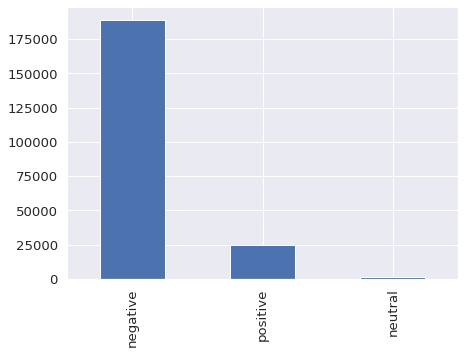

In [ ]:
# How many positive and negative and neutral reviews?
df['sentiment_label_1'].value_counts().plot(kind='bar')

SideEffects¶

In [ ]:
df['sideEffects_clean']

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df['sideEffects'].value_counts()

Mild Side Effects                83219
No Side Effects                  49593
Moderate Side Effects            44467
Severe Side Effects              31729
Extremely Severe Side Effects     6055
Name: sideEffects, dtype: int64

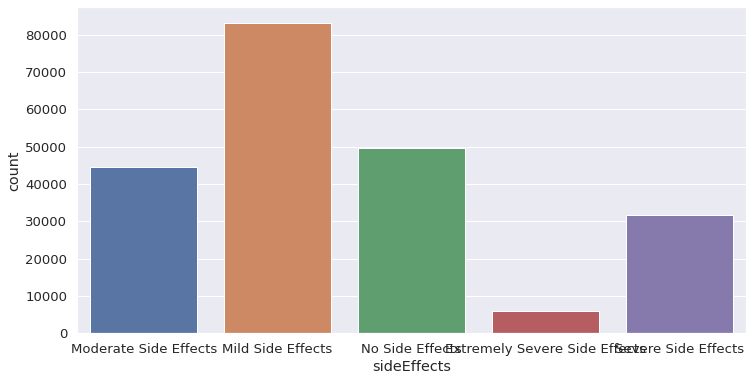

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(df['sideEffects'])

In [ ]:
pd.DataFrame(df.groupby('sideEffects')['drugName'])

0  \
0  Extremely Severe Side Effects   
1              Mild Side Effects   
2          Moderate Side Effects   
3                No Side Effects   
4            Severe Side Effects   

                                                   1  
0  36                                            ...  
1  3                                             ...  
2  0                                             ...  
3  9                        ethinyl estradiol   l...  
4  43                                            ...

In [ ]:
df.groupby('sideEffects')['drugName'].max()

sideEffects
Extremely Severe Side Effects           zytiga
Mild Side Effects                      zzzquil
Moderate Side Effects                  zzzquil
No Side Effects                         zytiga
Severe Side Effects              zyprexa zydis
Name: drugName, dtype: object

In [ ]:
df.groupby('sideEffects')['drugName'].min()

sideEffects
Extremely Severe Side Effects    abacavir   dolutegravir   lamivudine
Mild Side Effects                                          a   b otic
Moderate Side Effects                                      a   b otic
No Side Effects                  abacavir   dolutegravir   lamivudine
Severe Side Effects              abacavir   dolutegravir   lamivudine
Name: drugName, dtype: object

In [ ]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.polarity

def get_sentiment_label(text):
    blob = TextBlob(text)
    if blob.polarity > 0.3:
        result = 'positive'
    elif blob.polarity < 0.3:
        result = 'negative'
    else:
        result = 'neutral'
    return result

In [ ]:
# Sentiment Score for side effect
df['sentiment 2'] = df['sideEffects_clean'].apply(get_sentiment)

In [ ]:
# Sentiment Labels for side effect
df['sentiment_label _2'] = df['sideEffects_clean'].apply(get_sentiment_label)

In [ ]:
df[['sideEffects_clean','sentiment 2','sentiment_label _2']]

In [ ]:
# How many positive and negative and neutral reviews ?
df['sentiment_label _2'].value_counts()

negative    131844
positive     83219
Name: sentiment_label _2, dtype: int64

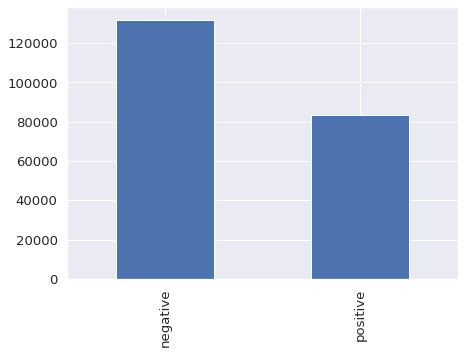

In [ ]:
# How many positive and negative and neutral reviews?
df['sentiment_label _2'].value_counts().plot(kind='bar')

In [ ]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.polarity

def get_sentiment_label(text):
    blob = TextBlob(text)
    if blob.polarity > 0.3:
        result = 'positive'
    elif blob.polarity < 0.3:
        result = 'negative'
    else:
        result = 'neutral'
    return result

In [ ]:
# Sentiment Score for side effect
df['sentiment 3'] = df['sideEffectsReview_clean'].apply(get_sentiment)

In [ ]:
# Sentiment Labels for side effect
df['sentiment_label _3'] = df['sideEffectsReview_clean'].apply(get_sentiment_label)

In [ ]:
df[['sideEffectsReview_clean','sentiment 3','sentiment_label _3']]

In [ ]:
# How many positive and negative and neutral reviews ?
df['sentiment_label _3'].value_counts()

negative    185062
positive     29981
neutral         20
Name: sentiment_label _3, dtype: int64

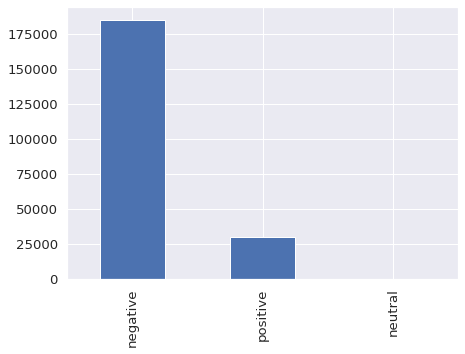

In [ ]:
# How many positive and negative and neutral reviews?
df['sentiment_label _3'].value_counts().plot(kind='bar')

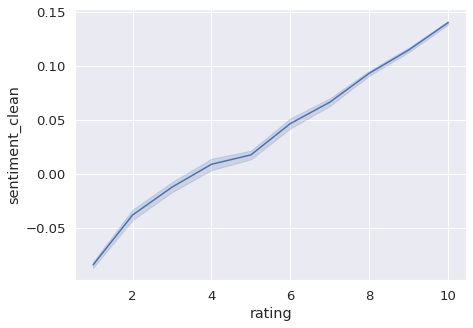

In [ ]:
#### Correlation Between Our  review sentiment and rating
sns.lineplot(data=df,x='rating',y='sentiment_clean')
plt.show()

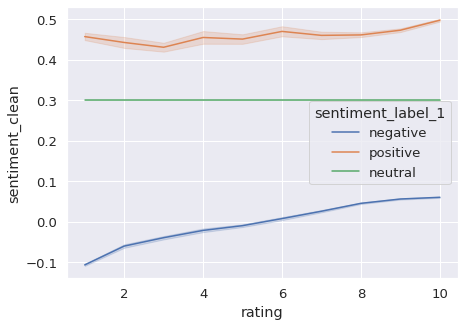

In [ ]:
# Correlation  btween rating and  review  sentiment
sns.lineplot(data=df,x='rating',y='sentiment_clean',hue='sentiment_label_1')

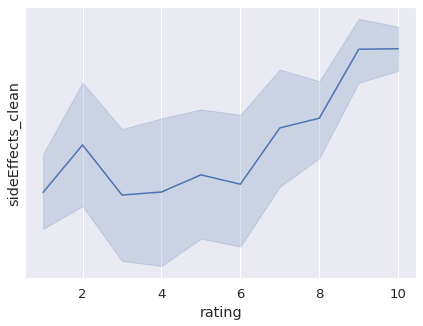

In [ ]:
#### Correlation Between Our  review sentiment and rating
sns.lineplot(data=df,x='rating',y='sideEffects_clean')
plt.show()

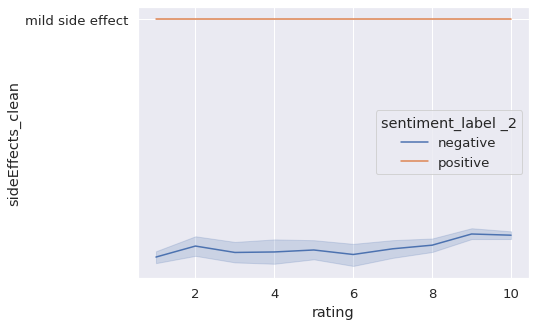

In [ ]:
# Correlation  btween rating and  review  sentiment
sns.lineplot(data=df,x='rating',y='sideEffects_clean',hue='sentiment_label _2')

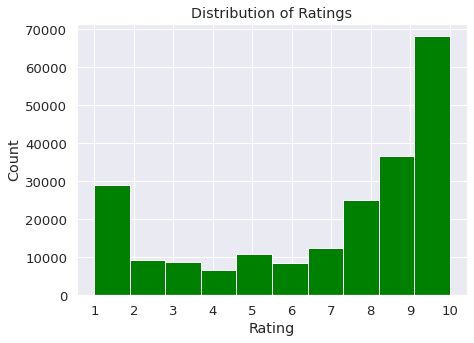

In [ ]:
# Look at bias in review (also shown on 'Data' page in competition: distribution of ratings)
df["rating"].hist(color='green')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks([i for i in range(1, 11)]);

In [ ]:
# Genuine Good  Rating Per Review for benifit
good_review =  df[(df['rating'] >= 6) & (df['sentiment_label_1'] == 'positive')]

In [ ]:
good_review

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

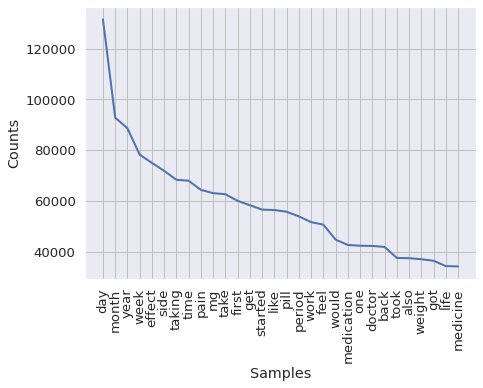

Word  Frequency
0          day     131593
1        month      92822
2         year      88605
3         week      78213
4       effect      74958
5         side      71806
6       taking      68298
7         time      67926
8         pain      64300
9           mg      63035
10        take      62601
11       first      59998
12         get      58265
13     started      56527
14        like      56372
15        pill      55704
16      period      53864
17        work      51595
18        feel      50602
19       would      44691
20  medication      42587
21         one      42283
22      doctor      42211
23        back      41804
24        took      37471
25        also      37374
26      weight      36960
27         got      36360
28        life      34267
29    medicine      34114
30       since      33814
31         bad      32742
32       still      32575
33     anxiety      32286
34      really      31741
35        much      31214
36        hour      30081
37       never      30009
38      better      29328
39        went      29176
40         two      28702
41     control      28366
42          go      28350
43       night      27990
44        help      27799
45        felt      27621
46        well      27230
47       every      27191
48        good      26561
49        even      25784
50       great      25749
51        drug      25049
52       sleep      24679
53         ago      23759
54       thing      23730
55        last      23373
56       tried      23129
57        acne      22542
58       birth      22350
59        made      21814
60  depression      21789
61      little      21718
62       going      21360
63        dose      20991
64        make      20877
65  prescribed      20615
66      worked      20575
67        used      20372
68    headache      20175
69     problem      20014
70     feeling      19982
71       could      19965
72      almost      19947
73      severe      19557
74         put      19475
75     getting      19460
76         lot      19188
77        mood      18773
78         use      17450
79       cramp      17326
80  experience      17229
81         far      17194
82     nothing      17161
83        ever      17131
84        skin      17068
85     symptom      16852
86      nausea      16618
87          lb      16556
88        away      16371
89        know      16258
90     thought      16220
91         try      16203
92         sex      16200
93         say      16172
94     stopped      16161
95       think      16097
96       using      16080
97    bleeding      15957
98      normal      15450
99        lost      15445

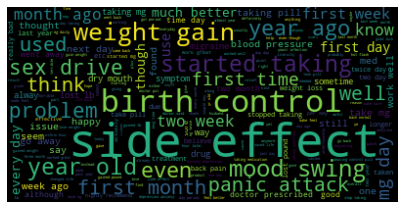

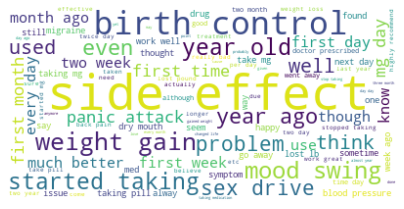

In [ ]:
#Count frequency for 'review'
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

#Build frequency distance matrix
txt = df.review_clean.str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

#Words with higher frequency
word_dist.plot(30,cumulative=False)
plt.show()

#The top 100 words
rslt = pd.DataFrame(word_dist.most_common(100), columns=['Word', 'Frequency'])
display(rslt)

wordcloud = WordCloud().generate(txt)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud1 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(txt)
plt.figure()
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis("off")
plt.show()

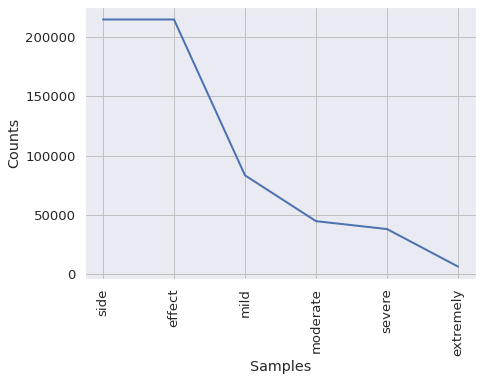

Word  Frequency
0       side     215063
1     effect     215063
2       mild      83219
3   moderate      44467
4     severe      37784
5  extremely       6055

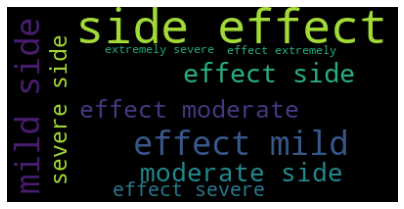

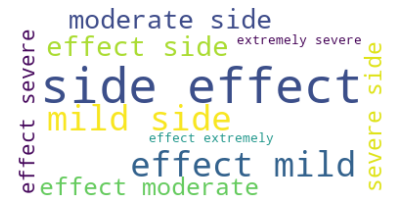

In [ ]:
#Count frequency for 'side effect_clean'
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

#Build frequency distance matrix
txt = df.sideEffects_clean.str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

#Words with higher frequency
word_dist.plot(30,cumulative=False)
plt.show()

#The top 100 words
rslt = pd.DataFrame(word_dist.most_common(100), columns=['Word', 'Frequency'])
display(rslt)

wordcloud = WordCloud().generate(txt)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud1 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(txt)
plt.figure()
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis("off")
plt.show()

n-grams

In [ ]:
review_clean = df['review_clean'].astype(str).apply(review_to_words)

from collections import Counter
p = Counter(" ".join(review_clean).split()).most_common(30)
rslt = pd.DataFrame(p, columns=['Word', 'Frequency'])
print(rslt)

          Word  Frequency
0          day     131593
1        month      92822
2         year      88605
3         week      78213
4       effect      74958
5         side      71806
6       taking      68298
7         time      67926
8         pain      64300
9           mg      63035
10        take      62601
11       first      59998
12         get      58265
13     started      56527
14        like      56372
15        pill      55704
16      period      53864
17        work      51596
18        feel      50602
19       would      44691
20  medication      42587
21         one      42283
22      doctor      42211
23        back      41804
24        took      37471
25        also      37374
26      weight      36960
27         got      36189
28        life      34267
29    medicine      34114


In [ ]:
from nltk import ngrams

'''Function for Counting combination of words '''
def count_ngrams(series: pd.Series, n: int) -> pd.Series:
    ngrams = series.copy().str.split(' ').explode()
    for i in range(1, n):
        ngrams += ' ' + ngrams.groupby(level=0).shift(-i)
        ngrams = ngrams.dropna()
    return ngrams.value_counts().head(30) 

count_ngrams(review_clean,3)

side effect dry mouth               509
side effect weight gain             445
ortho tri cyclen lo                 397
mood swing weight gain              309
weight gain mood swing              302
post traumatic stress disorder      293
side effect go away                 284
mg three time day                   244
take mg twice day                   215
side effect went away               212
feel like new person                206
took plan b hour                    195
plan b one step                     192
started taking birth control        188
take pill every day                 185
first birth control pill            181
first birth control ever            174
side effect first week              165
feel like old self                  162
experienced negative side effect    160
taking birth control pill           149
get worse get better                147
worst birth control ever            147
would recommend birth control       142
best decision ever made             141


In [ ]:
'''Function for Word cloud'''
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

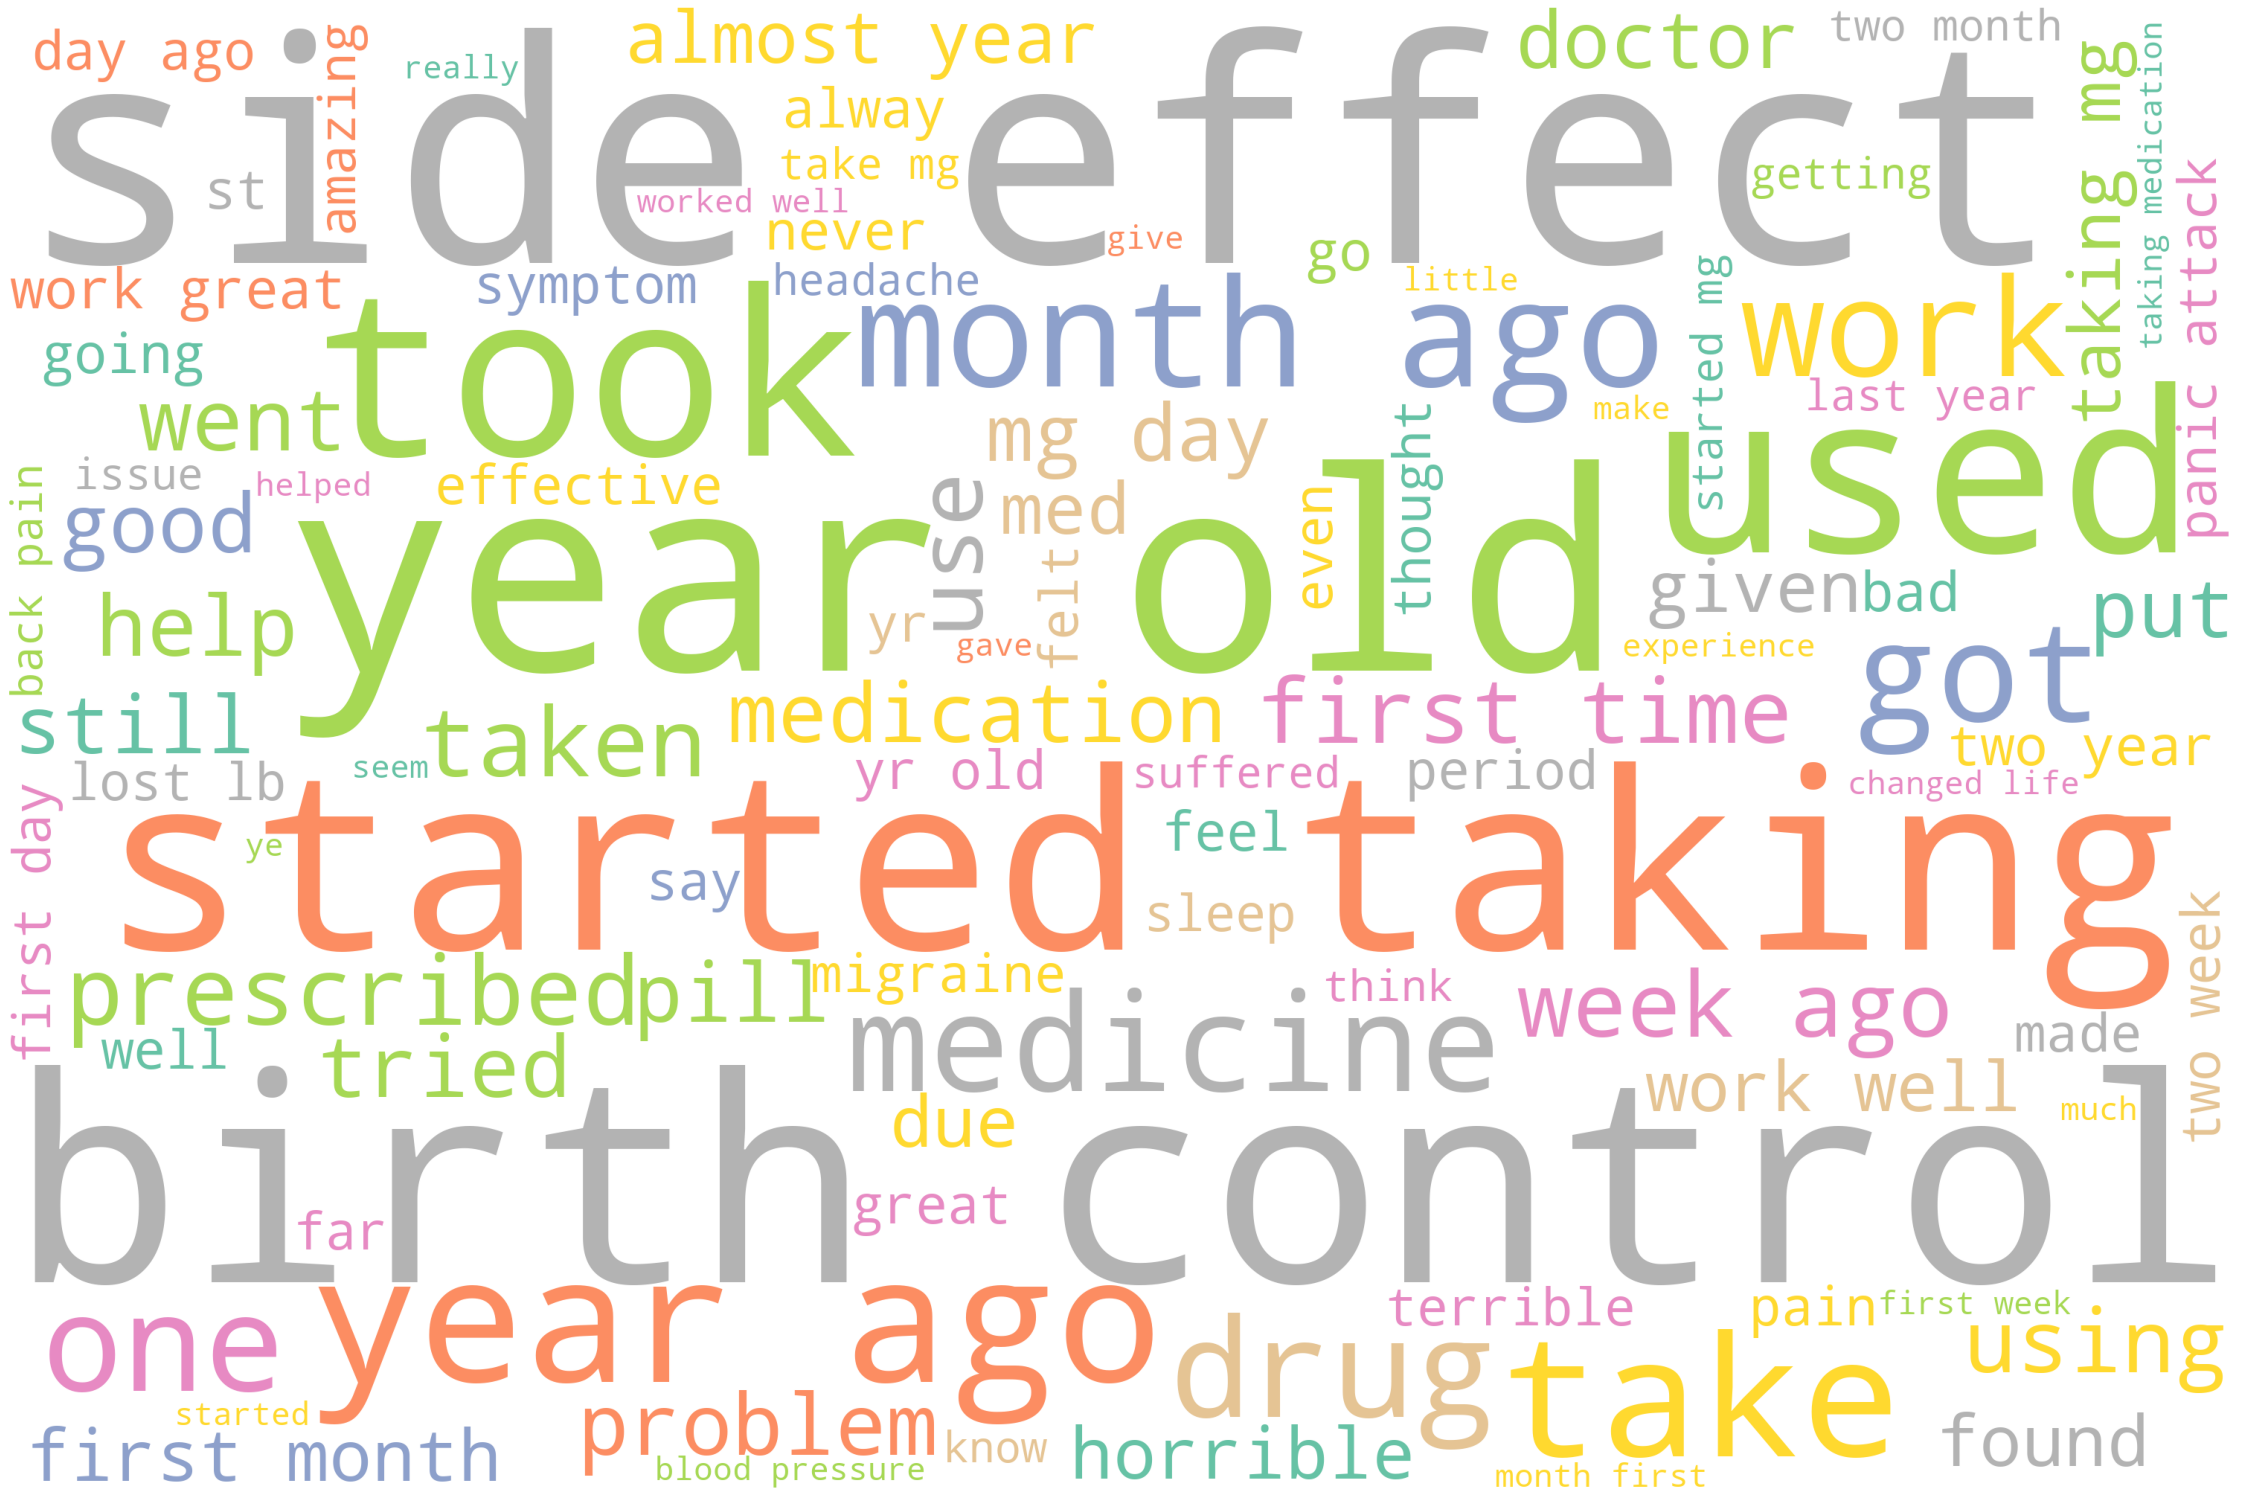

In [ ]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='white', max_words=100,colormap='Set2',stopwords=stopwords).generate(str(review_clean))
# Plot
plot_cloud(wordcloud)

In [ ]:
from nltk import ngrams

sentence = 'son halfway fourth week intuniv became concerned began last week started taking highest dose two day could hardly get bed cranky slept nearly hour drive home school vacation unusual called doctor monday morning said stick day see school getting morning last two day problem free much agreeable ever le emotional good thing le cranky remembering thing overall behavior better tried many different medication far effective     '

for n in range(1, 6):
    print(str(n) + '-grams:\n', list(ngrams(sentence.split(), n)))

1-grams:
 [('son',), ('halfway',), ('fourth',), ('week',), ('intuniv',), ('became',), ('concerned',), ('began',), ('last',), ('week',), ('started',), ('taking',), ('highest',), ('dose',), ('two',), ('day',), ('could',), ('hardly',), ('get',), ('bed',), ('cranky',), ('slept',), ('nearly',), ('hour',), ('drive',), ('home',), ('school',), ('vacation',), ('unusual',), ('called',), ('doctor',), ('monday',), ('morning',), ('said',), ('stick',), ('day',), ('see',), ('school',), ('getting',), ('morning',), ('last',), ('two',), ('day',), ('problem',), ('free',), ('much',), ('agreeable',), ('ever',), ('le',), ('emotional',), ('good',), ('thing',), ('le',), ('cranky',), ('remembering',), ('thing',), ('overall',), ('behavior',), ('better',), ('tried',), ('many',), ('different',), ('medication',), ('far',), ('effective',)]
2-grams:
 [('son', 'halfway'), ('halfway', 'fourth'), ('fourth', 'week'), ('week', 'intuniv'), ('intuniv', 'became'), ('became', 'concerned'), ('concerned', 'began'), ('began', '

featuer enginerring¶

In [ ]:
df.head()

drugName                     condition  \
0  206461                 valsartan  left ventricular dysfunction   
1   95260                guanfacine                          adhd   
2   92703                    lybrel                 birth control   
3  138000                ortho evra                 birth control   
4   35696  buprenorphine   naloxone             opiate dependence   

                                              review  rating  \
0  "It has no side effect, I take it in combinati...       9   
1  "My son is halfway through his fourth week of ...       8   
2  "I used to take another oral contraceptive, wh...       5   
3  "This is my first time using any form of birth...       8   
4  "Suboxone has completely turned my life around...       9   

                date  usefulCount            sideEffects  \
0       May 20, 2012           27  Moderate Side Effects   
1     April 27, 2010          192  Moderate Side Effects   
2  December 14, 2009           17  Moderate Side Effects   
3   November 3, 2015           10      Mild Side Effects   
4  November 27, 2016           37      Mild Side Effects   

                                   sideEffectsReview  \
0  * mild nausea, vomiting, bloating, stomach cra...   
1  * mild nausea, vomiting, bloating, stomach cra...   
2  * mild nausea, vomiting, bloating, stomach cra...   
3  An occasional headache was experienced while t...   
4  An occasional headache was experienced while t...   

                                        review_clean     sideEffects_clean  \
0  side effect take combination bystolic mg fish oil  moderate side effect   
1  son halfway fourth week intuniv became concern...  moderate side effect   
2  used take another oral contraceptive pill cycl...  moderate side effect   
3  first time using form birth control glad went ...      mild side effect   
4  suboxone completely turned life around feel he...      mild side effect   

                             sideEffectsReview_clean  sentiment_clean  \
0  mild nausea vomiting bloating stomach cramp br...         0.000000   
1  mild nausea vomiting bloating stomach cramp br...         0.188021   
2  mild nausea vomiting bloating stomach cramp br...         0.159790   
3  occasional headache experienced taking medicat...         0.262500   
4  occasional headache experienced taking medicat...         0.163333   

  sentiment_label_1  sentiment 2 sentiment_label _2  sentiment 3  \
0          negative     0.000000           negative    -0.116667   
1          negative     0.000000           negative    -0.116667   
2          negative     0.000000           negative    -0.116667   
3          negative     0.333333           positive     0.400000   
4          negative     0.333333           positive     0.400000   

  sentiment_label _3  
0           negative  
1           negative  
2           negative  
3           positive  
4           positive

In [ ]:
df['polarity']=df['review'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [ ]:
df['review_len']=df['review'].apply(lambda x: len(x))

In [ ]:
df['word_count'] = df['review'].apply(lambda x: len(x.split()))

In [ ]:
def get_avg_word_len(x):
    words = x.split()
    word_len = 0.3
    for word in words:
        word_len=word_len+len(word)
        
        return word_len/len(words)   

In [ ]:
df.head()

drugName                     condition  \
0  206461                 valsartan  left ventricular dysfunction   
1   95260                guanfacine                          adhd   
2   92703                    lybrel                 birth control   
3  138000                ortho evra                 birth control   
4   35696  buprenorphine   naloxone             opiate dependence   

                                              review  rating  \
0  "It has no side effect, I take it in combinati...       9   
1  "My son is halfway through his fourth week of ...       8   
2  "I used to take another oral contraceptive, wh...       5   
3  "This is my first time using any form of birth...       8   
4  "Suboxone has completely turned my life around...       9   

                date  usefulCount            sideEffects  \
0       May 20, 2012           27  Moderate Side Effects   
1     April 27, 2010          192  Moderate Side Effects   
2  December 14, 2009           17  Moderate Side Effects   
3   November 3, 2015           10      Mild Side Effects   
4  November 27, 2016           37      Mild Side Effects   

                                   sideEffectsReview  \
0  * mild nausea, vomiting, bloating, stomach cra...   
1  * mild nausea, vomiting, bloating, stomach cra...   
2  * mild nausea, vomiting, bloating, stomach cra...   
3  An occasional headache was experienced while t...   
4  An occasional headache was experienced while t...   

                                        review_clean     sideEffects_clean  \
0  side effect take combination bystolic mg fish oil  moderate side effect   
1  son halfway fourth week intuniv became concern...  moderate side effect   
2  used take another oral contraceptive pill cycl...  moderate side effect   
3  first time using form birth control glad went ...      mild side effect   
4  suboxone completely turned life around feel he...      mild side effect   

                             sideEffectsReview_clean  sentiment_clean  \
0  mild nausea vomiting bloating stomach cramp br...         0.000000   
1  mild nausea vomiting bloating stomach cramp br...         0.188021   
2  mild nausea vomiting bloating stomach cramp br...         0.159790   
3  occasional headache experienced taking medicat...         0.262500   
4  occasional headache experienced taking medicat...         0.163333   

  sentiment_label_1  sentiment 2 sentiment_label _2  sentiment 3  \
0          negative     0.000000           negative    -0.116667   
1          negative     0.000000           negative    -0.116667   
2          negative     0.000000           negative    -0.116667   
3          negative     0.333333           positive     0.400000   
4          negative     0.333333           positive     0.400000   

  sentiment_label _3  polarity  review_len  word_count  
0           negative  0.000000          79          17  
1           negative  0.168333         740         141  
2           negative  0.067210         754         134  
3           positive  0.179545         448          89  
4           positive  0.194444         719         124

Term frequency

In [ ]:
df.head()

In [ ]:
tf1 = (df['review_clean'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

Inverse Document Frequency

In [ ]:
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(df.shape[0]/(len(df[df['review_clean'].str.contains(word)])))

tf1

Term Frequency – Inverse Document Frequency (TF-IDF)

In [ ]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
vect = tfidf.fit_transform(df['review_clean'])
vect

Bag of Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
data_bow = bow.fit_transform(df['review_clean']).toarray()
data_bow

MODEL BUILDING

In [ ]:
# Label Encoding Drugname and Conditions
from sklearn.preprocessing import LabelEncoder
label_encoder_feat = {}
for feature in ['drugName', 'condition', 'sentiment 2']:
    label_encoder_feat[feature] = LabelEncoder()
    df[feature] = label_encoder_feat[feature].fit_transform(df[feature])

In [ ]:
# Importing Libraries for the Machine Learning Model
from xgboost import XGBClassifier
from lightgbm import LGBMModel,LGBMClassifier, plot_importance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [ ]:
df.columns

Index([' ', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount',
       'sideEffects', 'sideEffectsReview', 'review_clean', 'sideEffects_clean',
       'sideEffectsReview_clean', 'sentiment_clean', 'sentiment_label_1',
       'sentiment 2', 'sentiment_label _2', 'sentiment 3',
       'sentiment_label _3', 'polarity', 'review_len', 'word_count', 'day',
       'month', 'year'],
      dtype='object')

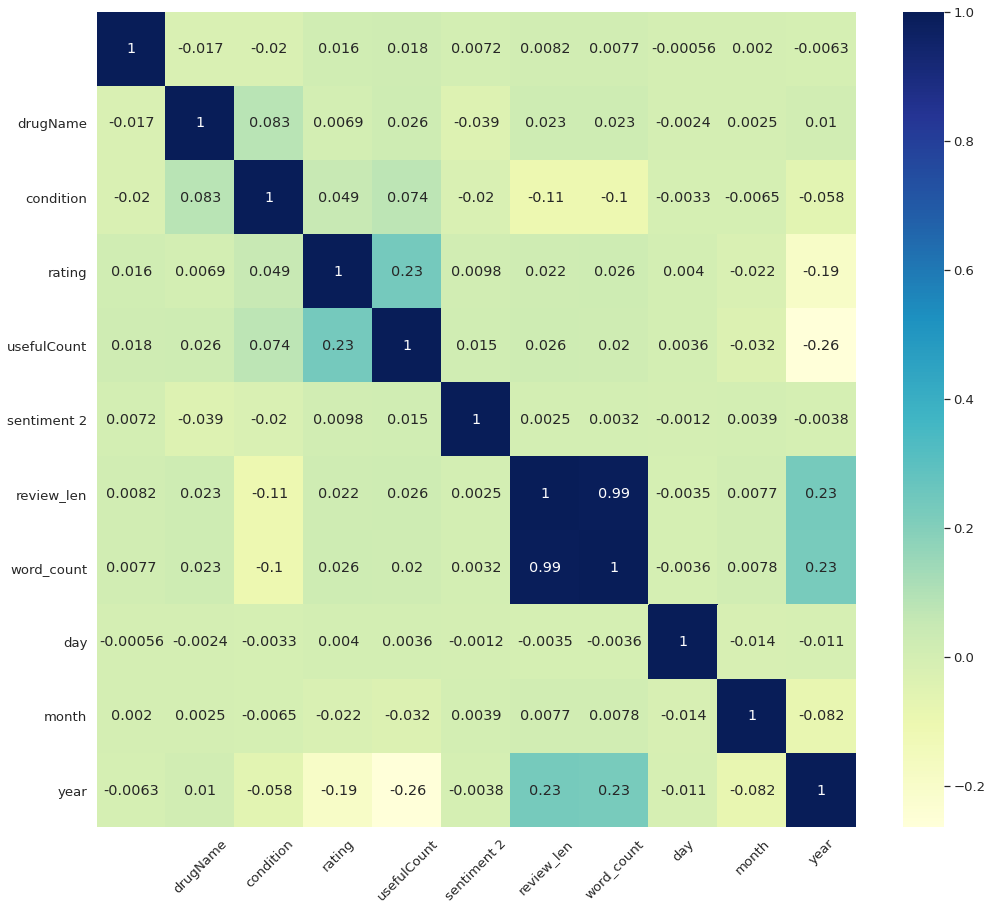

In [ ]:
# Correlation Heatmap of the features engineered
plt.rcParams['figure.figsize'] = [17,15]
sns.set(font_scale = 1.2)
corr = df.select_dtypes(include = 'int64').corr()
sns_ = sns.heatmap(corr, annot = True, cmap = 'YlGnBu')
plt.setp(sns_.get_xticklabels(), rotation = 45);


In [ ]:
# Separating the day, month and year from the Date
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [ ]:
# Defining Features and splitting the data as train and test set
features = df[['drugName', 'condition',  'usefulCount','rating',
       'sentiment_clean', 'sentiment 3',
       'polarity', 'review_len', 'word_count', 'day', 'month',
       'year']]
      

target = df['sentiment 2']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)

Model - I LightGBM

In [ ]:
# Training Model - I
clf = LGBMClassifier(
        n_estimators=10000,
        learning_rate=0.10,
        num_leaves=30,
        subsample=.9,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1,
        )
model = clf.fit(X_train, y_train)


In [ ]:
y_pred_train = model.predict(X_train)
print ("The Accuracy of the model is : ", accuracy_score(y_train, y_pred_train))


The Accuracy of the model is :  0.9906073971729196


In [ ]:
# Predictions
y_pred = model.predict(X_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, y_pred))


The Accuracy of the model is :  0.8601342240270308


In [ ]:
print ("The confusion Matrix is ")
confusion_matrix(y_test, predictions)

In [ ]:
print ("The confusion Matrix is ")
confusion_matrix(y_train, y_pred_train)

The confusion Matrix is 


array([[ 4219,     9,     5],
       [    1, 87469,   461],
       [    3,   935, 57442]])

Model - II XGBClassifier

In [ ]:
# Importing Libraries for the Machine Learning Model
from xgboost import XGBClassifier
from lightgbm import LGBMModel,LGBMClassifier, plot_importance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [ ]:
# Training Model - II
from xgboost import plot_importance
xgb_clf = XGBClassifier(n_estimator = 10000,
                    learning_rate=0.10,
                    num_leaves=30)

model_xgb = xgb_clf.fit(X_train, y_train)


In [ ]:
y_pred_train = model_xgb.predict(X_train)
print ("The Accuracy of the model is : ", accuracy_score(y_train, y_pred_train))

The Accuracy of the model is :  0.8027819109363376


In [ ]:
# Predictions
y_pred_2 = model_xgb.predict(X_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, y_pred_2))


The Accuracy of the model is :  0.8039647235698012


In [ ]:
from pickle import dump

In [ ]:
# save model to disk
xgb = 'finalised_model.sav'
dump(model_xgb, open('xgb', 'wb'))

In [ ]:
print ("The confusion Matrix is ")
confusion_matrix(y_test, predictions_2)

In [ ]:
# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
model_gnb = GaussianNB().fit(X_train, y_train)



In [ ]:
y_pred_train = model_gnb.predict(X_train)
print ("The Accuracy of the model is : ", accuracy_score(y_train, y_pred_train))

The Accuracy of the model is :  0.5722778722499734


In [ ]:
y_gnb_pred = model_gnb.predict(X_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, y_gnb_pred))

The Accuracy of the model is :  0.5742339465893768


In [ ]:
# accuracy on X_test
accuracy = gnb.score(X_test, y_test)
print accuracy